In [ ]:
#pip install ee

In [ ]:
#pip install geemap

# Import Libraries

In [7]:
import ee
import geemap
import pandas as pd
import numpy as np 
from matplotlib import pyplot
from io import StringIO


#ee.Authenticate()  # Only needed for the first time
ee.Initialize()
Map= geemap.Map()

In [23]:
# Read the lake names from Excel data
LMT_Path = 'LTM_Data_2023_3_9.xlsx'
df_LMT_lakes = pd.read_excel(LMT_Path, usecols=['SITE_ID','PROGRAM_ID', 'DATE_SMP', 'DOC_MG_L'])

data_path = 'Site_Information_2022_8_1 (2).xlsx'
df_lake_info = pd.read_excel(data_path, usecols=['SITE_ID','PROGRAM_ID', 'SITE_NAME', 'LATDD', 'LONDD'])

In [24]:
data = df_lake_info[df_lake_info['PROGRAM_ID']== 'LTM_ALTM'] 
data

,SITE_ID,PROGRAM_ID,LATDD,LONDD,SITE_NAME
5,020058,LTM_ALTM,44.51709,-74.12604,Little Hope Pond
7,020059,LTM_ALTM,44.51360,-74.12673,Big Hope Pond
8,020138,LTM_ALTM,44.31384,-74.37335,East Copperas Pond
9,020188,LTM_ALTM,44.34609,-74.30065,Sunday Pond
10,020197,LTM_ALTM,44.35282,-74.29424,Sochia Pond
11,030171,LTM_ALTM,44.65698,-74.49562,Grass Pond (3)
12,030172,LTM_ALTM,44.66022,-74.49632,Little Clear Pond
13,030255,LTM_ALTM,44.43219,-74.29813,Black Pond Stream
15,040210,LTM_ALTM,43.96821,-74.95708,Willys Lake
16,040576,LTM_ALTM,43.86566,-74.95512,Woods Lake


In [25]:
data1 = df_LMT_lakes[df_LMT_lakes['PROGRAM_ID']== 'LTM_ALTM'] 
data1

,SITE_ID,PROGRAM_ID,DATE_SMP,DOC_MG_L
86,1A1-052,LTM_ALTM,1989-10-01,5.000000
87,1A1-102,LTM_ALTM,1982-12-13,4.900000
88,1A1-102,LTM_ALTM,1983-07-25,3.700000
89,1A1-102,LTM_ALTM,1983-10-03,2.900000
90,1A1-102,LTM_ALTM,1986-06-18,2.800000
...,...,...,...,...
38345,1A1-017,LTM_ALTM,2020-06-02,6.437770
38346,1A1-103,LTM_ALTM,2019-11-14,7.429081
38347,1A1-109,LTM_ALTM,2019-11-14,6.892175
38348,030172,LTM_ALTM,2021-02-04,7.474600


In [26]:
merged_df = df_LMT_lakes.merge(df_lake_info, on=['SITE_ID', 'PROGRAM_ID'])
merged_All_Lakes = merged_df[merged_df['PROGRAM_ID'] == 'LTM_ALTM']
merged_All_Lakes

,SITE_ID,PROGRAM_ID,DATE_SMP,DOC_MG_L,LATDD,LONDD,SITE_NAME
2847,1A1-052,LTM_ALTM,1989-10-01,5.000000,43.98230,-74.23556,Arbutus Pond
2848,1A1-052,LTM_ALTM,1992-07-13,6.983000,43.98230,-74.23556,Arbutus Pond
2849,1A1-052,LTM_ALTM,1993-03-10,4.293000,43.98230,-74.23556,Arbutus Pond
2850,1A1-052,LTM_ALTM,1998-02-04,6.675000,43.98230,-74.23556,Arbutus Pond
2851,1A1-052,LTM_ALTM,2000-06-08,5.784000,43.98230,-74.23556,Arbutus Pond
...,...,...,...,...,...,...,...
21247,1A3-065,LTM_ALTM,2008-03-06,3.559000,43.50877,-74.88168,South Lake (East Branch)
21248,1A3-065,LTM_ALTM,2012-08-13,2.596989,43.50877,-74.88168,South Lake (East Branch)
21249,1A3-065,LTM_ALTM,2014-01-13,3.983151,43.50877,-74.88168,South Lake (East Branch)
21250,1A3-065,LTM_ALTM,2015-10-08,3.142626,43.50877,-74.88168,South Lake (East Branch)


In [27]:
# Function to create a five-sided polygon around the latitude and longitude
def create_lake_polygon(lat, lon):
    # Assuming each pixel is approximately 20 meters in size
    buffer_distance_meters = 2 * 20  
    
    # Convert buffer distance from meters to degrees (approximate conversion)
    buffer_distance_degrees = buffer_distance_meters / 111320.0
    
    # Define the coordinates of the five vertices of the polygon
    coordinates = [
        [lon, lat + buffer_distance_degrees],
        [lon + buffer_distance_degrees, lat + buffer_distance_degrees/2],
        [lon + buffer_distance_degrees/2, lat - buffer_distance_degrees/2],
        [lon - buffer_distance_degrees/2, lat - buffer_distance_degrees/2],
        [lon - buffer_distance_degrees, lat + buffer_distance_degrees/2]
    ]
    
    # Create the polygon geometry
    polygon = ee.Geometry.Polygon(coordinates)
    
    return polygon

In [41]:
# Function to process the data for a specific lake
def process_lake(lake_name, lat, lon):
    # Create a polygon around the lake using the latitude and longitude
    lake_polygon = create_lake_polygon(lat, lon)

    # Load the lake polygon to the map
    Map.addLayer(ee.Feature(lake_polygon), {'color': 'blue'}, lake_name)

    # Load the lake-specific feature collection
    lake_collection = ee.FeatureCollection('projects/ee-touheda-khanom/assets/samplinglakes') \
        .filter(ee.Filter.eq('SITE_NAME', lake_name))

# Load Sentinel-2 data and apply the processing steps for the lake
s2 = ee.ImageCollection('COPERNICUS/S2_SR') \
    .filter(ee.Filter.calendarRange(2019, 2023, 'year')) \
    .filterBounds(lake_polygon) \
    .map(maskS2clouds) \
    .select(sentinel2_bands, STD_NAMES) \
    .map(lambda img: cdom(img, lake_polygon)) \
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 25))

In [94]:
# Load the lake-specific feature collection
lake_collection = ee.FeatureCollection('projects/ee-touheda-khanom/assets/samplinglakes') \
    .filter(ee.Filter.eq('SITE_NAME', merged_All_Lakes))

In [42]:
sentinel2_bands =['B1','B2','B3','B4','B5','B6','B8','B8A','B11']
STD_NAMES = ['Aerosols', 'Blue', 'Green', 'Red', 'RedEdge1','RedEdge2','RedEdge4','NIR','SWIR1']

# Masking Clouds

In [43]:
def maskS2clouds(image):
    qa = image.select('QA60')
    # Bits 10 and 11 are clouds and cirrus, respectively.
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11

    # Create the cloud mask
    cloudMask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))

    # Apply the cloud mask to the image
    maskedImage = image.updateMask(cloudMask)

    return maskedImage

In [44]:
# Function to calculate CDOM from Sentinel-2 images
def cdom(img, lake):
    cdo = img.expression("(20.3 - 10. * (b2 / b3) - 2.4 * (b3 / b4))", {
        'b1': img.select('Aerosols'),
        'b2': img.select('Blue'),
        'b3': img.select('Green'),
        'b4': img.select('Red')
    }).rename("CO")
    
    bad2 = cdo.where(cdo.gte(0), 1).rename("bad2")
    co = cdo.multiply(bad2).rename("CO")
    mask = co.neq(0)

    return img.addBands(co).clip(lake_polygon).updateMask(mask)

In [45]:
# Create a geemap Map
Map = geemap.Map()

# Get the list of lake names
lake_names = merged_All_Lakes['SITE_NAME'].tolist()

# Prompt the user to enter the name of the lake they want to process
selected_lake = input("Enter the name of the lake you want to analyze: ")

# Check if the selected lake is in the list of lake names
if selected_lake not in lake_names:
    print("Lake not found. Please select a valid lake.")
else:
    # Get the information for the selected lake
    lake_info = merged_All_Lakes[merged_All_Lakes['SITE_NAME'] == selected_lake].iloc[0]
    lat = lake_info['LATDD']
    lon = lake_info['LONDD']

    # Create a polygon around the selected lake using the latitude and longitude
    lake_polygon = create_lake_polygon(lat, lon)

    # Call the process_lake function to process the data for the selected lake
    process_lake(selected_lake, lat, lon)

    # Center the map on the selected lake
    Map.centerObject(ee.Feature(lake_polygon), 14)

# Display the map
Map.addLayerControl()
Map

Enter the name of the lake you want to analyze: Big Moose Lake


Map(center=[43.81694485887238, -74.85611000031606], controls=(WidgetControl(options=['position', 'transparent_…

TraitError: The 'east' trait of a Map instance expected a float, not the NoneType None.

TraitError: The 'east' trait of a Map instance expected a float, not the NoneType None.

In [33]:
#Map.user_roi.getInfo()

In [46]:
vis_params = {'bands': ['Red', 'Green', 'Blue'], 'min': 0.0, 'max': 100.0, 'opacity': 1.0, 'gamma': 1.0}

In [47]:
vis_params = {'bands': ['Red', 'Green', 'Blue'], 'min': 0.0, 'max': 100.0, 'opacity': 1.0, 'gamma': 1.0}

# CDOM

In [74]:
def station_mean(img): # station_mean function with a single parameter img
    #mean of a specific band (CO) within a region 
    mean = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=lake_polygon, scale=30).get('CO')
    return img.set('date', img.date().format()).set('CDOM',mean)

station_reduced_imgs = s2.map(station_mean)
nested_list = station_reduced_imgs.reduceColumns(ee.Reducer.toList(2), ['date','CDOM']).values().get(0)
df = pd.DataFrame(nested_list.getInfo(), columns=['date','CDOM'])

df = pd.DataFrame(nested_list.getInfo(), columns=['date','CDOM'])
pd.set_option('display.max_rows', None)

df


,date,CDOM
0,2019-06-15T16:01:07,10.194731
1,2019-07-10T16:01:15,9.142892
2,2019-08-14T16:01:07,9.492138
3,2019-09-13T16:01:02,10.872059
4,2019-09-18T16:01:03,10.724097
5,2019-10-08T16:01:05,11.838899
6,2019-10-13T16:01:07,12.611972
7,2019-11-17T16:01:02,8.674944
8,2020-03-01T16:00:59,8.985820
9,2020-03-16T16:01:02,10.149368


In [75]:
df['date'] = pd.to_datetime(df['date'])

# Format 'date' column to exclude the time
df['date'] = df['date'].dt.date
df

,date,CDOM
0,2019-06-15,10.194731
1,2019-07-10,9.142892
2,2019-08-14,9.492138
3,2019-09-13,10.872059
4,2019-09-18,10.724097
5,2019-10-08,11.838899
6,2019-10-13,12.611972
7,2019-11-17,8.674944
8,2020-03-01,8.985820
9,2020-03-16,10.149368


In [76]:
# import pandas as pd

# # Filter out CDOM values greater than 20
# df = df[df['CDOM'] <= 20]


# df

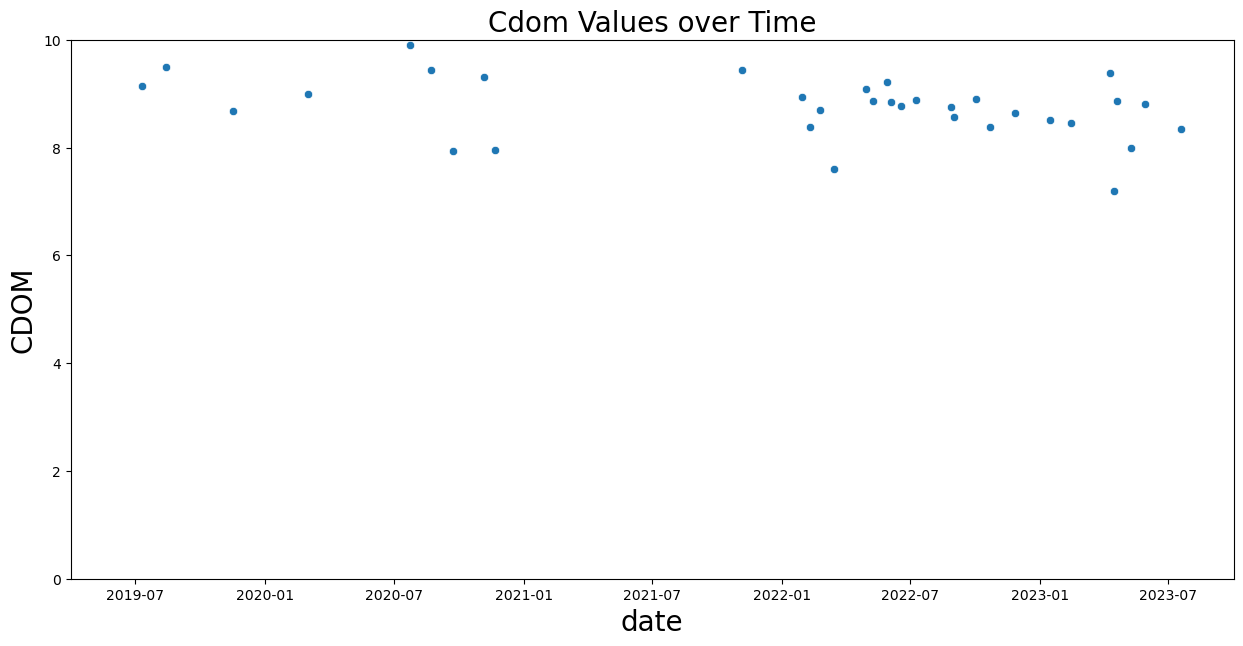

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
# Create a figure with subplots and set the dimensions to 15 x 7
fig, ax = plt.subplots(figsize=(15, 7))

# Create the plot by setting our dataframe to the data argument
sns.scatterplot(data=df, x='date', y='CDOM', ax=ax)

# Set the labels and title
ax.set_ylabel('CDOM', fontsize=20)
ax.set_xlabel('date', fontsize=20)
ax.set_title('Cdom Values over Time', fontsize=20)
ax.set_ylim(0,10)

# Format the x-axis tick labels to display only the year
# ax.xaxis.set_major_formatter(plt.FixedFormatter(df['date'].dt.year.unique()))

# Display the plot
plt.show()


# Reflectance Values

In [57]:
def reflectance(img): 
    #img is used to calculate the mean of specific bands indicated by STD_NAMES
    reflectance_values = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=lake_polygon, scale=30).select(STD_NAMES)
    return ee.Feature(None, {'date': img.date().format(), 'reflectance': reflectance_values})

s2_reflectance = s2.map(reflectance)
s2_list = s2_reflectance.reduceColumns(ee.Reducer.toList(2), ['date', 'reflectance']).values().get(0)
df_s2_reflectance = pd.DataFrame(s2_list.getInfo(), columns=['date', 'reflectance'])

# Convert date column to datetime and extract date only
df_s2_reflectance['date'] = pd.to_datetime(df_s2_reflectance['date']).dt.date

# Set the reflectance column values to a dictionary
df_s2_reflectance['reflectance'] = df_s2_reflectance['reflectance'].apply(lambda x: {k: v for k, v in x.items() if v is not None})
df_s2_reflectance

,date,reflectance
0,2019-06-15,"{'Aerosols': 357.16640502354795, 'Blue': 384.0..."
1,2019-07-10,"{'Aerosols': 602.2496075353217, 'Blue': 694.49..."
2,2019-08-14,"{'Aerosols': 596.8555729984301, 'Blue': 462.20..."
3,2019-09-13,"{'Aerosols': 251.04709576138148, 'Blue': 227.6..."
4,2019-09-18,"{'Aerosols': 146.13186813186815, 'Blue': 194.4..."
5,2019-10-08,"{'Aerosols': 112.27472527472527, 'Blue': 170.6..."
6,2019-10-13,"{'Aerosols': 156.42857142857142, 'Blue': 158.5..."
7,2019-11-17,"{'Aerosols': 1030.0345368916796, 'Blue': 924.9..."
8,2020-03-01,"{'Aerosols': 2506.065934065934, 'Blue': 2176.3..."
9,2020-03-16,"{'Aerosols': 634.4458398744113, 'Blue': 748.27..."


In [58]:
# Create empty lists to store the data
data = []

# Extract the bands, reflectance values, and dates where available
for index, row in df_s2_reflectance.iterrows():
    date = row['date']
    reflectance = row['reflectance']
    
    if reflectance:
        for band in STD_NAMES:
            value = reflectance.get(band)
            data.append({'Band': band, 'Reflectance': value, 'Date': date})

# Create a dataframe from the data
df_data = pd.DataFrame(data)

# Display the dataframe
print(df_data)



         Band  Reflectance        Date
0    Aerosols   357.166405  2019-06-15
1        Blue   384.083203  2019-06-15
2       Green   599.048666  2019-06-15
3         Red   399.503925  2019-06-15
4    RedEdge1   938.211931  2019-06-15
5    RedEdge2  2090.249608  2019-06-15
6    RedEdge4  2412.023548  2019-06-15
7         NIR  2576.299843  2019-06-15
8       SWIR1  1523.029827  2019-06-15
9    Aerosols   602.249608  2019-07-10
10       Blue   694.497645  2019-07-10
11      Green   853.726845  2019-07-10
12        Red   692.133438  2019-07-10
13   RedEdge1  1058.012559  2019-07-10
14   RedEdge2  2381.084772  2019-07-10
15   RedEdge4  2832.368917  2019-07-10
16        NIR  2906.362637  2019-07-10
17      SWIR1  1806.014129  2019-07-10
18   Aerosols   596.855573  2019-08-14
19       Blue   462.202512  2019-08-14
20      Green   589.697017  2019-08-14
21        Red   547.985871  2019-08-14
22   RedEdge1  1064.340659  2019-08-14
23   RedEdge2  2472.849294  2019-08-14
24   RedEdge4  2564.42386

In [98]:
# data_by_month = {}

# for img in lake_collection:
#     date = img.date()
#     month = date.get('month')

#     if month not in data_by_month:
#         data_by_month[month] = {band: [] for band in STD_NAMES}

#     for band in STD_NAMES:
#         reflectance_value = img.reduceRegion(ee.Reducer.mean(), lake_polygon, 10).get(band)
#         if reflectance_value is not None:
#             reflectance_value /= 10000  # Convert from DN to reflectance
#             data_by_month[month][band].append(reflectance_value)

# # Calculate the average reflectance values for each band within each month
# average_data = {'band': [], 'average_reflectance': []}

# for month, data in data_by_month.items():
#     for band, reflectance_values in data.items():
#         if reflectance_values:
#             average_value = sum(reflectance_values) / len(reflectance_values)
#             average_data['band'].append(band)
#             average_data['average_reflectance'].append(average_value)

# # Create a dataframe from the average data and display it
# df_average_data = pd.DataFrame(average_data)
# print(df_average_data)

# # Create a geemap Map
# Map = geemap.Map()

# # Loop over the target lake names and process each lake
# for lake_name in merged_All_Lakes:
#     process_lake(lake_name)

# # Center the map on the first lake
# Map.centerObject(merged_All_Lakes.loc[merged_All_Lakes['GNIS_Name'] == merged_All_Lakes[0], 'geometry'].values[0], 14)

# # Display the map
# Map.addLayerControl()
# Map  # This will display the interactive map with the lakes and their data


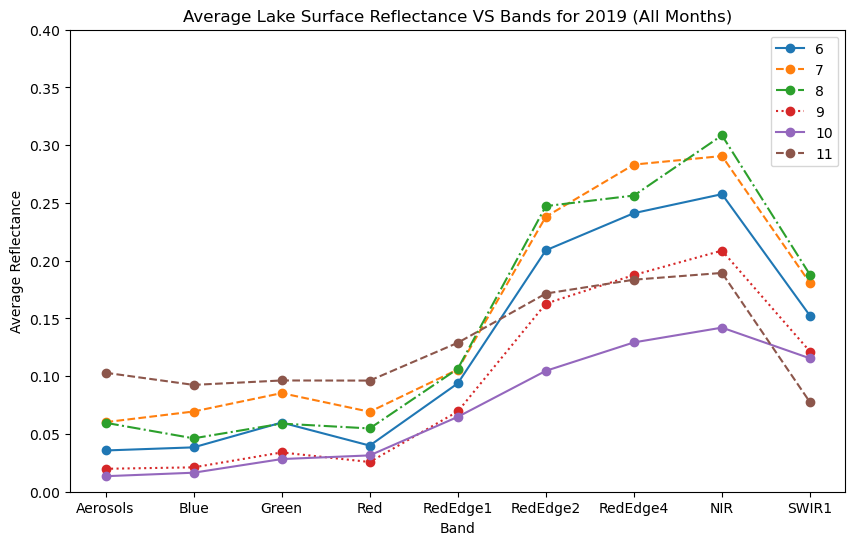

In [68]:
data_by_month = {}

for index, row in df_s2_reflectance.iterrows():
    date = row['date']
    reflectance = row['reflectance']
    
    year = date.year
    
    if year == 2019:
        month = date.month
        
        if month not in data_by_month:
            data_by_month[month] = {'band': [], 'dates': [], 'reflectance': []}
        
        if reflectance:
            for band in STD_NAMES:
                value = reflectance.get(band)
                if value is not None:
                    value /= 10000  # Divide by 10000 to convert from DN to reflectance
                    data_by_month[month]['band'].append(band)
                    data_by_month[month]['dates'].append(date)
                    data_by_month[month]['reflectance'].append(value)

plt.figure(figsize=(10, 6))

line_styles = ['-', '--', '-.', ':']  # List of line styles
num_styles = len(line_styles)
style_index = 0

for month, data in data_by_month.items():
    unique_dates = list(set(data['dates']))  # Get unique dates for the month
    line_style = line_styles[style_index % num_styles]  # Cycle through line styles
    
    average_reflectance_values = []
    for band in STD_NAMES:
        reflectance_values = [data['reflectance'][i] for i in range(len(data['band'])) if data['band'][i] == band]
        
        if len(reflectance_values) > 0:
            average_reflectance = sum(reflectance_values) / len(reflectance_values)
            average_reflectance_values.append(average_reflectance)
        else:
            average_reflectance_values.append(0)
    
    plt.plot(STD_NAMES, average_reflectance_values, linestyle=line_style, marker='o', label=month)
    style_index += 1

plt.xlabel('Band')
plt.ylabel('Average Reflectance')
plt.ylim(0, 0.4)  # Adjust the y-axis limit based on the reflectance range
plt.title('Average Lake Surface Reflectance VS Bands for 2019 (All Months)')
plt.legend()
plt.show()




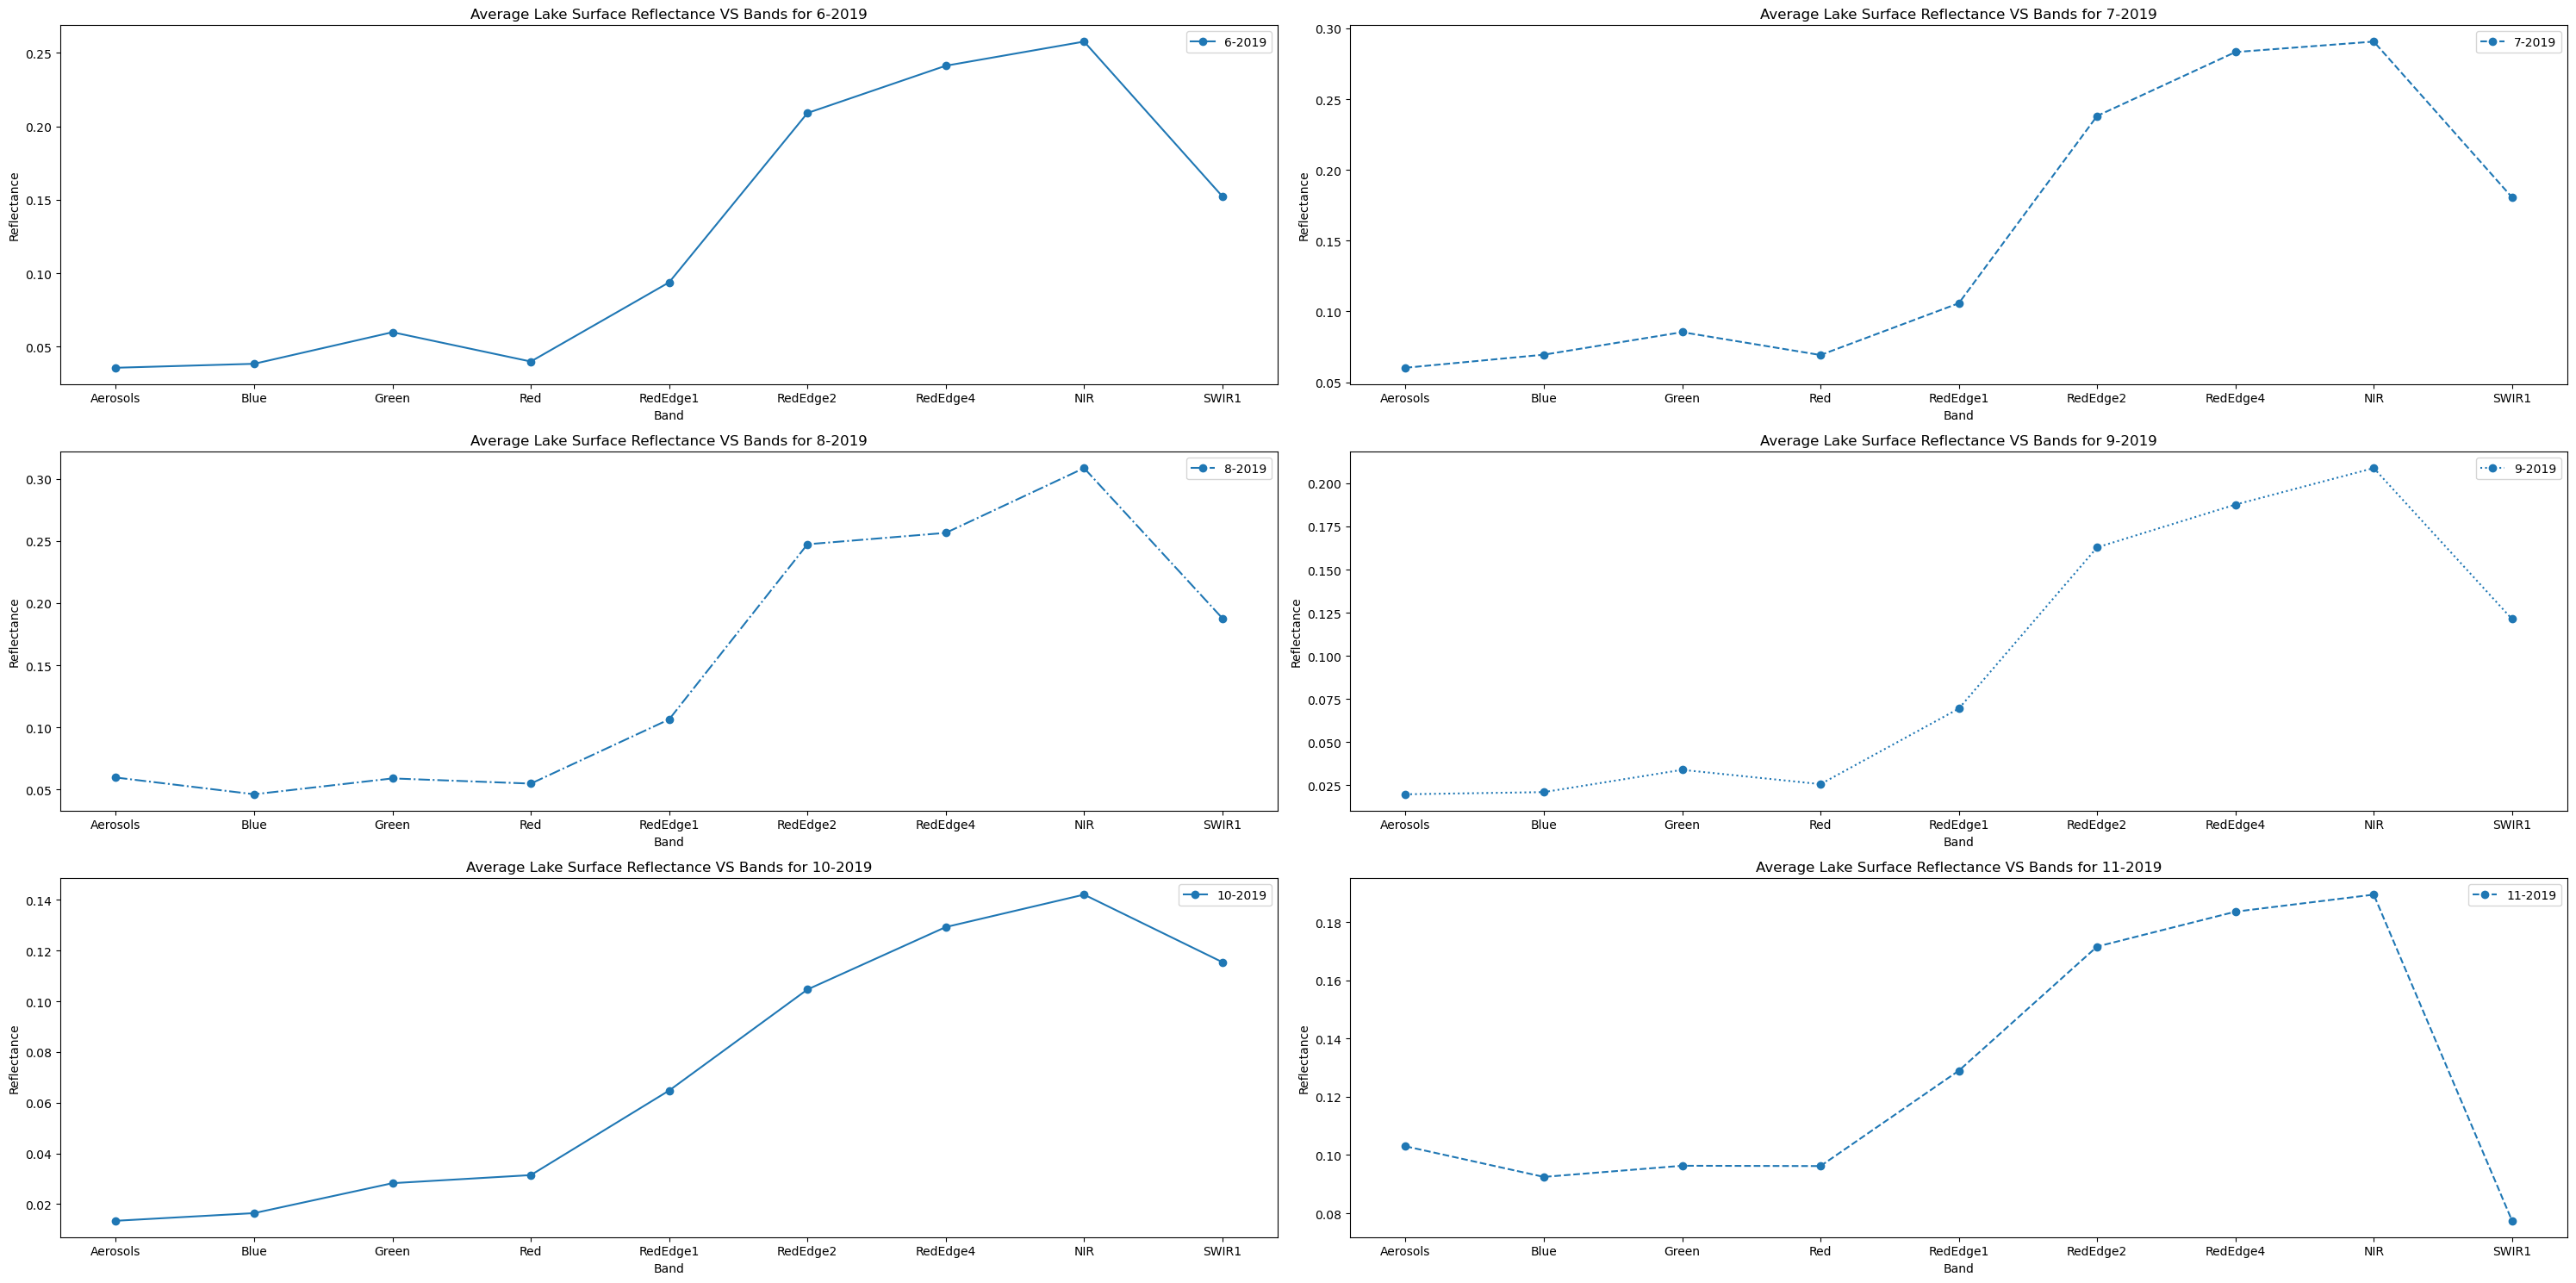

In [61]:
import numpy as np

data_by_month = {}

# Iterate over the dataframe rows
for index, row in df_s2_reflectance.iterrows():
    date = row['date']
    reflectance = row['reflectance']
    
    year = date.year
    
    # Filter data for specific months
    if year == 2019 and date.month in [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
        month = date.month
        
        if month not in data_by_month:
            data_by_month[month] = {band: [] for band in STD_NAMES}
        
        if reflectance:
            for band in STD_NAMES:
                value = reflectance.get(band)
                if value is not None:
                    value /= 10000  # Divide by 10000 to convert from DN to reflectance
                    data_by_month[month][band].append(value)
                else:
                    data_by_month[month][band].append(np.nan)

# Calculate the average reflectance values for each band within each month
averages_by_month = {
    month: {band: np.nanmean(values) for band, values in data.items()}
    for month, data in data_by_month.items()
}

# Define plot parameters
line_styles = ['-', '--', '-.', ':']  # List of line styles
num_styles = len(line_styles)

# Calculate the number of rows and columns for the subplots
num_months = len(data_by_month)
num_cols = 2  # Number of subplots per row
num_rows = (num_months + num_cols - 1) // num_cols

fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(30, 5 * num_rows))

# Flatten the axs array to iterate over subplots
axs = axs.flatten()

# Iterate over the data for each month
for i, (month, data) in enumerate(averages_by_month.items()):
    line_style = line_styles[i % num_styles]  # Cycle through line styles
    
    axs[i].set_xlabel('Band')
    axs[i].set_ylabel('Reflectance')
    axs[i].set_title(f'Average Lake Surface Reflectance VS Bands for {month}-2019')
    
    bands = list(data.keys())
    reflectance_values = list(data.values())
    axs[i].plot(bands, reflectance_values, linestyle=line_style, marker='o', label=f'{month}-2019')
    
    axs[i].legend()

plt.tight_layout()
plt.show()





# DOC

In [78]:
import pandas as pd

# Read the data from the Excel file
data_doc = pd.read_excel('LTM_Data_2023_3_9.xlsx', usecols=['DOC_MG_L', 'SITE_ID', 'DATE_SMP'])

data_doc = data_doc[data_doc['DOC_MG_L'].notnull()]

# Sort the DataFrame by 'DATE_SMP' column in ascending order
data_doc = data_doc.sort_values(by='DATE_SMP')

# Filter data from 2016 onwards
data_doc = data_doc[data_doc['DATE_SMP'] >= '2019-01-01']

# Select the 'DATE_SMP' and 'DOC_MG_L' columns and filter by specific_site_id
specific_site_id = '1A1-103'  # BIG_MOOSE_LAKE
data = data_doc[data_doc['SITE_ID'] == specific_site_id][['DATE_SMP', 'DOC_MG_L','SITE_ID']].rename(columns={'DATE_SMP': 'Date', 'DOC_MG_L': 'DOC'})

print(data)


            Date       DOC  SITE_ID
18861 2019-02-05  7.659300  1A1-103
38335 2019-04-02  6.400300  1A1-103
37120 2019-05-01  5.958300  1A1-103
16544 2019-07-09  5.888300  1A1-103
1887  2019-09-04  5.505700  1A1-103
38346 2019-11-14  7.429081  1A1-103
37128 2020-02-03  7.373080  1A1-103
5568  2020-05-28  5.758763  1A1-103
32198 2020-07-14  5.007855  1A1-103
16554 2020-09-01  4.970554  1A1-103
3125  2020-11-05  5.042800  1A1-103
28525 2021-02-03  6.499600  1A1-103
34632 2021-04-01  7.029300  1A1-103
1901  2021-05-04  6.989800  1A1-103
8040  2021-07-15  5.821500  1A1-103
11687 2021-09-02  7.912200  1A1-103


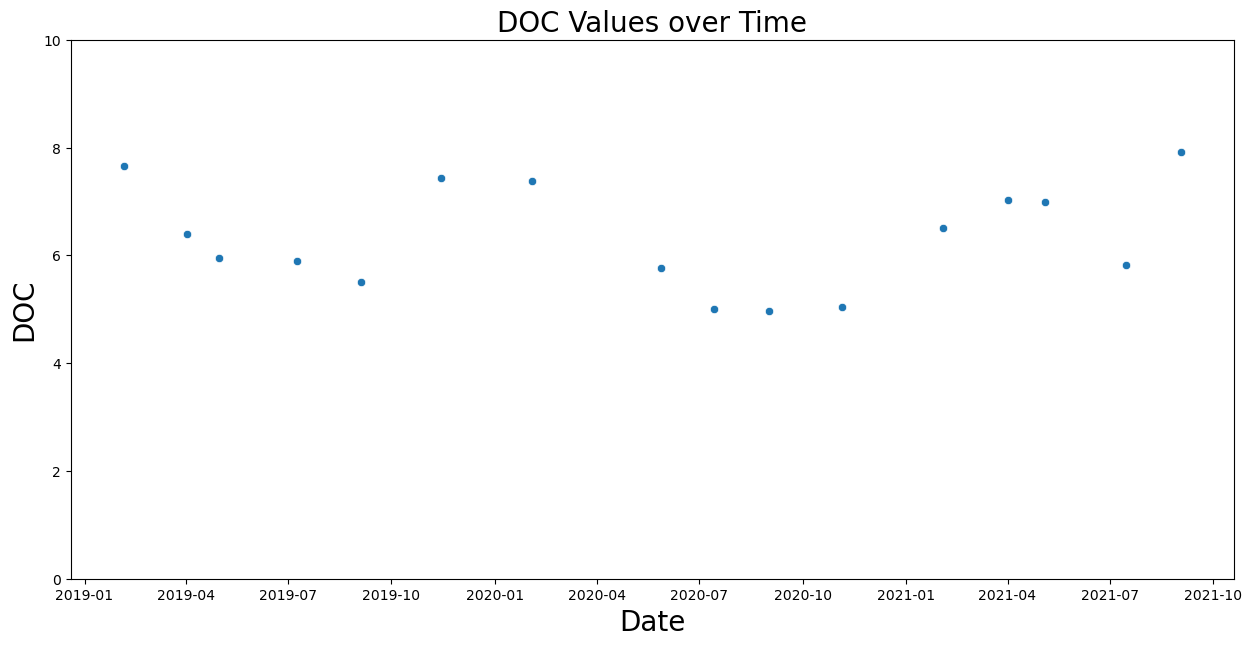

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# Create a figure with subplots and set the dimensions to 15 x 7
fig, ax = plt.subplots(figsize=(15, 7))

# Create the plot by setting our dataframe to the data argument
sns.scatterplot(data=data, x='Date', y='DOC', ax=ax)

# Set the labels and title
ax.set_ylabel('DOC', fontsize=20)
ax.set_xlabel('Date', fontsize=20)
ax.set_title('DOC Values over Time', fontsize=20)
ax.set_ylim(0, 10)

# Format the x-axis tick labels to display only the year
# ax.xaxis.set_major_formatter(plt.FixedFormatter(df['date'].dt.year.unique()))
#
# Display the plot
plt.show()


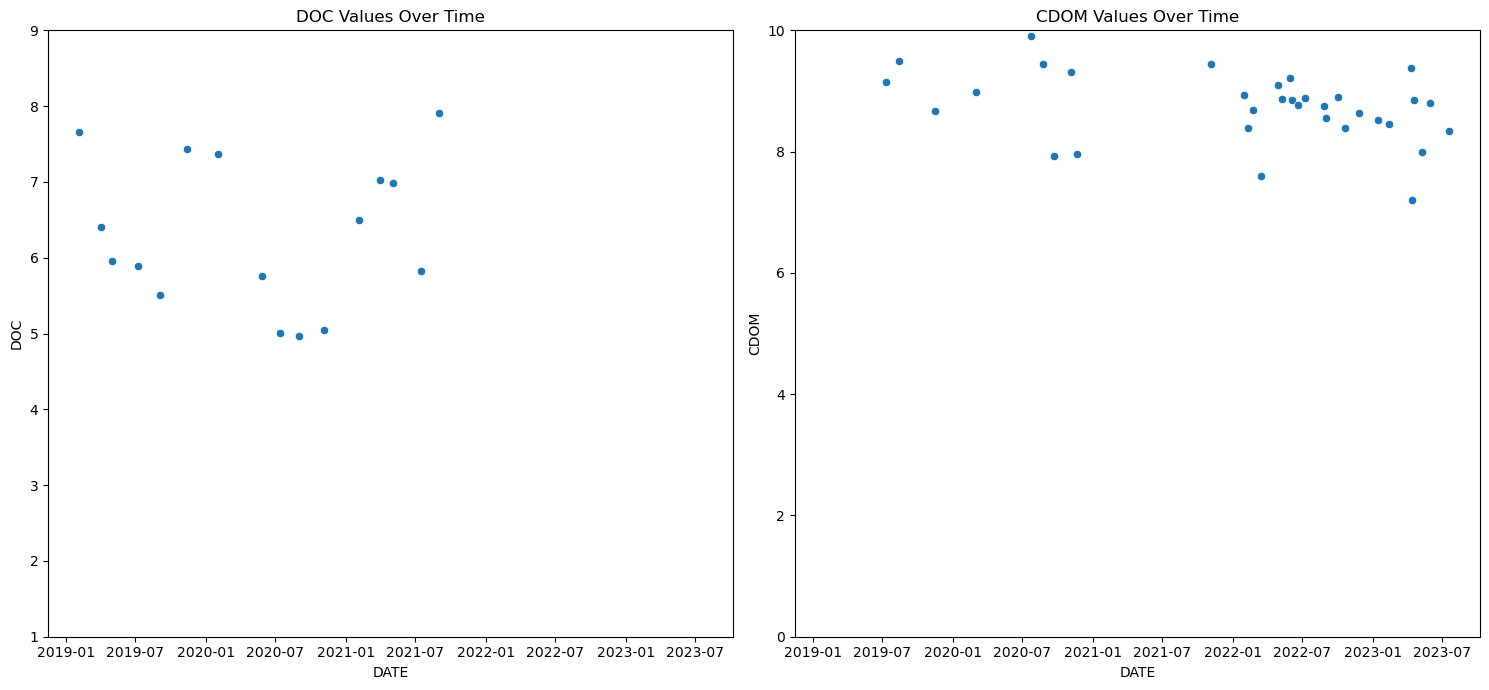

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7), sharex=True)

# Seaborn scatter plot
sns.scatterplot(data=data, x='Date', y='DOC', ax=ax1)
ax1.set_xlabel('DATE')
ax1.set_ylabel('DOC')
ax1.set_ylim(1,9)

ax1.set_title('DOC Values Over Time')

# Seaborn scatter plot
sns.scatterplot(data=df, x='date', y='CDOM', ax=ax2)
ax2.set_xlabel('DATE')
ax2.set_ylabel('CDOM')
ax2.set_ylim(0,10)
ax2.set_title('CDOM Values Over Time')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

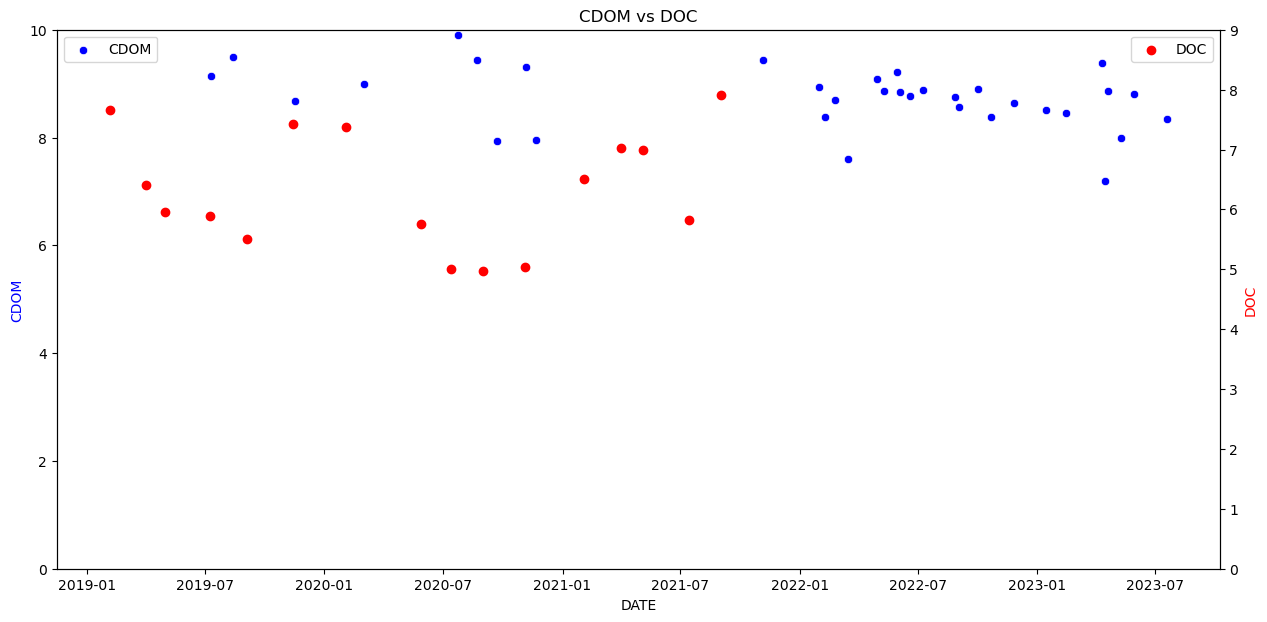

In [82]:
# CDOM vs DOC Timeseries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and an Axes object
fig, ax = plt.subplots(figsize=(15, 7))

# Seaborn scatter plot for CDOM
sns.scatterplot(data=df, x='date', y='CDOM', ax=ax, label='CDOM', color='blue')

# Create a twin Axes object for DOC
ax2 = ax.twinx()

# Matplotlib scatter plot for DOC
ax2.scatter(data['Date'], data['DOC'], label='DOC', color='red')

# Set the labels and title
ax.set_xlabel('DATE')
ax.set_ylabel('CDOM', color='blue')
ax2.set_ylabel('DOC', color='red')
ax.set_title('CDOM vs DOC')

# Set different ranges for the y-axes
ax.set_ylim(0,10)  # Adjust the range for CDOM
ax2.set_ylim(0, 9)  # Adjust the range for DOC

# Add legends
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the plot
plt.show()

In [83]:
# Sort the doc DataFrame by date in ascending order
data = data.sort_values(by='Date')

# Sort the keys in the 'date' column of df(CDOM) in ascending order
df.sort_values('date', inplace=True)

# Convert 'date' column in df(CDOM) to datetime dtype
df['date'] = pd.to_datetime(df['date'])

# Perform inner merge with five-day window
merged_inner = pd.merge_asof(df, data, left_on='date', right_on='Date', tolerance=pd.Timedelta(days=5))

# Get rid of the null values from doc
merged_inner = merged_inner.dropna()

print(merged_inner)




         date       CDOM       Date       DOC  SITE_ID
1  2019-07-10   9.142892 2019-07-09  5.888300  1A1-103
7  2019-11-17   8.674944 2019-11-14  7.429081  1A1-103
18 2020-07-19  10.320525 2020-07-14  5.007855  1A1-103
24 2020-11-06   9.314985 2020-11-05  5.042800  1A1-103
27 2021-04-05  13.244921 2021-04-01  7.029300  1A1-103


In [84]:
# Drop duplicate rows based on DOC column, keeping the first occurrence
merged_inner = merged_inner.drop_duplicates(subset=['DOC'])

# Print the updated DataFrame
#print(merged_inner)

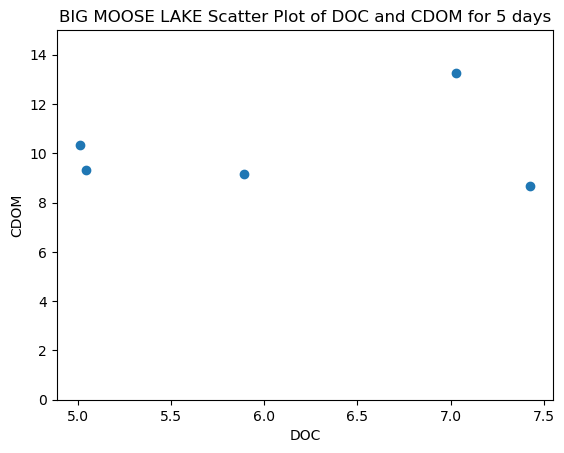

In [90]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(merged_inner['DOC'], merged_inner['CDOM'])
# Setting labels and title
plt.xlabel('DOC')
plt.ylabel('CDOM')
plt.title('BIG MOOSE LAKE Scatter Plot of DOC and CDOM for 5 days')
plt.ylim(0,15)
# Displaying the plot
plt.show()

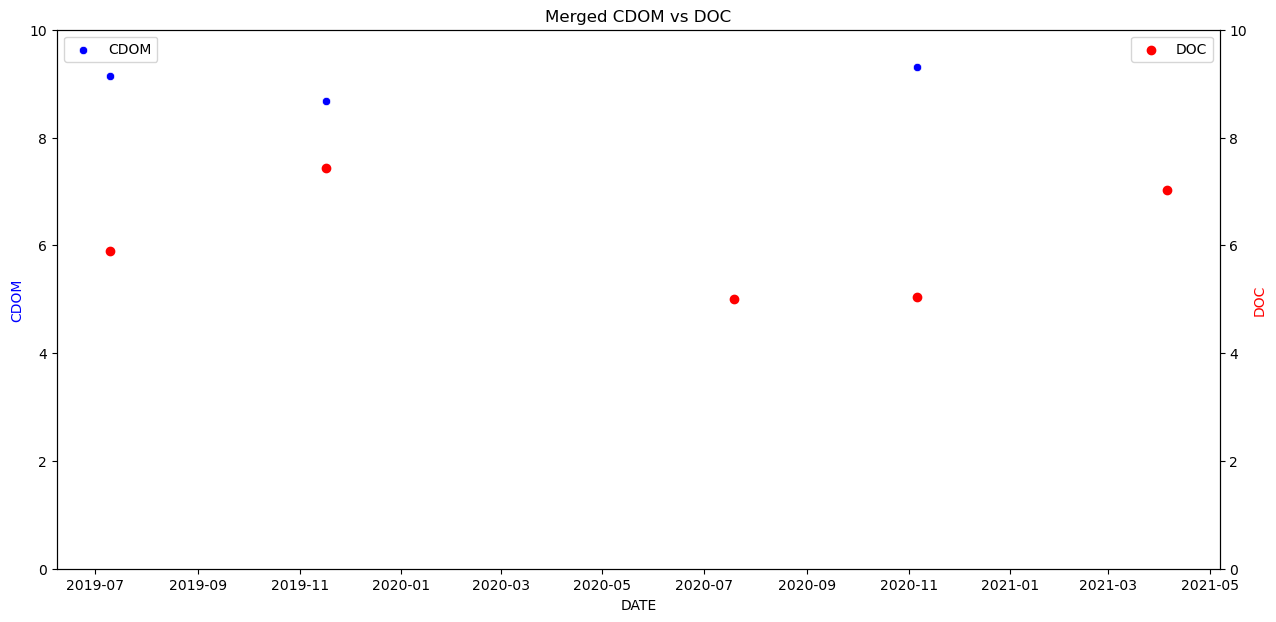

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and an Axes object
fig, ax = plt.subplots(figsize=(15, 7))

# Seaborn scatter plot for CDOM
sns.scatterplot(data=merged_inner, x='date', y='CDOM', ax=ax, label='CDOM', color='blue')

# Create a twin Axes object for DOC
ax2 = ax.twinx()

# Matplotlib scatter plot for DOC
ax2.scatter(merged_inner['date'], merged_inner['DOC'], label='DOC', color='red')

# Set the labels and title
ax.set_xlabel('DATE')
ax.set_ylabel('CDOM', color='blue')
ax2.set_ylabel('DOC', color='red')
ax.set_title('Merged CDOM vs DOC')

# Set different ranges for the y-axes
ax.set_ylim(0, 10)  # Adjust the range for CDOM
ax2.set_ylim(0, 10)  # Adjust the range for DOC

# Add legends
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the plot
plt.show()

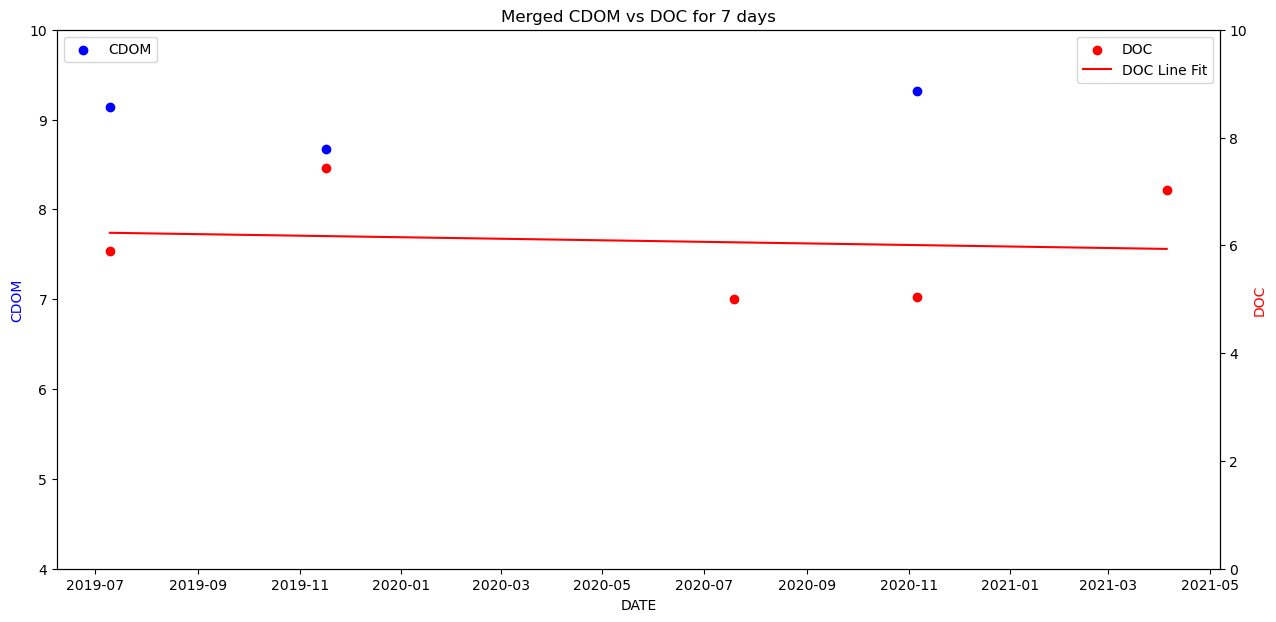

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Convert the date values to numeric format
merged_inner['date_numeric'] = pd.to_numeric(merged_inner['date']).astype(float)

# Create a figure and an Axes object
fig, ax = plt.subplots(figsize=(15, 7))

# Matplotlib scatter plot 
ax.scatter(merged_inner['date'], merged_inner['CDOM'], label='CDOM', color='blue')


# Create a twin Axes object for DOC
ax2 = ax.twinx()
ax2.scatter(merged_inner['date'], merged_inner['DOC'], label='DOC', color='red')


# Calculate the linear regression line for CDOM
cdom_x = merged_inner['date_numeric']
cdom_y = merged_inner['CDOM']
cdom_slope, cdom_intercept = np.polyfit(cdom_x, cdom_y, 1)
cdom_line = cdom_slope * cdom_x + cdom_intercept
#ax.plot(merged_inner['date'], cdom_line, color='blue', label='CDOM Line Fit')

# Calculate the linear regression line for DOC
doc_x = merged_inner['date_numeric']
doc_y = merged_inner['DOC']
doc_slope, doc_intercept = np.polyfit(doc_x, doc_y, 1)
doc_line = doc_slope * doc_x + doc_intercept
ax2.plot(merged_inner['date'], doc_line, color='red', label='DOC Line Fit')

# Set the labels and title
ax.set_xlabel('DATE')
ax.set_ylabel('CDOM', color='blue')
ax2.set_ylabel('DOC', color='red')
ax.set_title('Merged CDOM vs DOC for 7 days')

# Set different ranges for the y-axes
ax.set_ylim(4, 10)  # Adjust the range for CDOM
ax2.set_ylim(0, 10)  # Adjust the range for DOC

# Add legends
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the plot
plt.show()